In [153]:
import pandas as pd
import numpy as np
import hvplot.pandas as hvplot
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [154]:
# Read in the 2021 texans data
texans_2021_df = pd.read_csv(
    'Resources/2021_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2021_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/12/2021,1,Sun,1:00PM ET,boxscore,W,NaN,Jan-00,NaN,Jacksonville Jaguars,37.0,...,160.0,0.0,20.0,395.0,319.0,76.0,3.0,14.76,1.54,-0.16
09/19/2021,2,Sun,1:00PM ET,boxscore,L,NaN,01-Jan,@,Cleveland Browns,21.0,...,82.0,2.0,22.0,355.0,199.0,156.0,2.0,9.61,-8.22,-8.62
09/23/2021,3,Thu,8:20PM ET,boxscore,L,NaN,02-Jan,NaN,Carolina Panthers,9.0,...,42.0,0.0,28.0,407.0,290.0,117.0,0.0,-5.60,-14.35,5.17
10/03/2021,4,Sun,1:00PM ET,boxscore,L,NaN,03-Jan,@,Buffalo Bills,0.0,...,48.0,5.0,26.0,450.0,251.0,199.0,1.0,-32.68,-14.54,6.40
10/10/2021,5,Sun,1:00PM ET,boxscore,L,NaN,04-Jan,NaN,New England Patriots,22.0,...,67.0,1.0,21.0,352.0,226.0,126.0,2.0,13.76,-6.89,-8.60


In [155]:
# Drop the bye week from the data
texans_2021_df.drop(texans_2021_df.index[9], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2021_df.drop('Week', axis=1, inplace=True)
texans_2021_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2021_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2021_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2021_df.drop('Rec', axis=1, inplace=True)
texans_2021_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2021_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2021_df.loc[(texans_2021_df['win/loss'] == 'L'), 'results'] = 0
texans_2021_df.loc[(texans_2021_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2021_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/12/2021,Sun,W,Jacksonville Jaguars,37.0,21.0,22.0,449.0,289.0,160.0,0.0,20.0,395.0,319.0,76.0,3.0,14.76,1.54,-0.16,1.0
09/19/2021,Sun,L,Cleveland Browns,21.0,31.0,17.0,302.0,220.0,82.0,2.0,22.0,355.0,199.0,156.0,2.0,9.61,-8.22,-8.62,0.0
09/23/2021,Thu,L,Carolina Panthers,9.0,24.0,14.0,193.0,151.0,42.0,0.0,28.0,407.0,290.0,117.0,0.0,-5.60,-14.35,5.17,0.0
10/03/2021,Sun,L,Buffalo Bills,0.0,40.0,6.0,109.0,61.0,48.0,5.0,26.0,450.0,251.0,199.0,1.0,-32.68,-14.54,6.40,0.0
10/10/2021,Sun,L,New England Patriots,22.0,25.0,14.0,360.0,293.0,67.0,1.0,21.0,352.0,226.0,126.0,2.0,13.76,-6.89,-8.60,0.0


In [156]:
texans_2020_df = pd.read_csv(
    'Resources/2020_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2020_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
9/10/2020,1,Thu,8:20PM ET,boxscore,L,NaN,0-1,@,Kansas City Chiefs,20.0,...,118.0,1.0,28.0,369.0,203.0,166.0,0.0,8.16,-22.94,-1.59
9/20/2020,2,Sun,4:25PM ET,boxscore,L,NaN,0-2,NaN,Baltimore Ravens,16.0,...,51.0,2.0,23.0,407.0,177.0,230.0,0.0,-5.68,-15.93,3.20
9/27/2020,3,Sun,1:00PM ET,boxscore,L,NaN,0-3,@,Pittsburgh Steelers,21.0,...,29.0,1.0,25.0,387.0,218.0,169.0,0.0,4.41,-15.39,2.08
10/4/2020,4,Sun,1:00PM ET,boxscore,L,NaN,0-4,NaN,Minnesota Vikings,23.0,...,96.0,1.0,24.0,410.0,248.0,162.0,0.0,8.81,-17.07,1.44
10/11/2020,5,Sun,1:00PM ET,boxscore,W,NaN,1-4,NaN,Jacksonville Jaguars,30.0,...,129.0,2.0,22.0,364.0,289.0,75.0,2.0,18.24,-2.21,1.26


In [157]:
# Drop the bye week from the data
texans_2020_df.drop(texans_2020_df.index[7], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2020_df.drop('Week', axis=1, inplace=True)
texans_2020_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2020_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2020_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2020_df.drop('Rec', axis=1, inplace=True)
texans_2020_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2020_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2020_df.loc[(texans_2020_df['win/loss'] == 'L'), 'results'] = 0
texans_2020_df.loc[(texans_2020_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2020_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
9/10/2020,Thu,L,Kansas City Chiefs,20.0,34.0,21.0,360.0,242.0,118.0,1.0,28.0,369.0,203.0,166.0,0.0,8.16,-22.94,-1.59,0.0
9/20/2020,Sun,L,Baltimore Ravens,16.0,33.0,18.0,304.0,253.0,51.0,2.0,23.0,407.0,177.0,230.0,0.0,-5.68,-15.93,3.20,0.0
9/27/2020,Sun,L,Pittsburgh Steelers,21.0,28.0,13.0,260.0,231.0,29.0,1.0,25.0,387.0,218.0,169.0,0.0,4.41,-15.39,2.08,0.0
10/4/2020,Sun,L,Minnesota Vikings,23.0,31.0,20.0,386.0,290.0,96.0,1.0,24.0,410.0,248.0,162.0,0.0,8.81,-17.07,1.44,0.0
10/11/2020,Sun,W,Jacksonville Jaguars,30.0,14.0,24.0,486.0,357.0,129.0,2.0,22.0,364.0,289.0,75.0,2.0,18.24,-2.21,1.26,1.0


In [158]:
texans_2019_df = pd.read_csv(
    'Resources/2019_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2019_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
9/9/2019,1,Mon,7:10PM ET,boxscore,L,NaN,0-1,@,New Orleans Saints,28.0,...,180.0,1.0,25.0,510.0,362.0,148.0,1.0,19.60,-23.59,0.06
9/15/2019,2,Sun,1:00PM ET,boxscore,W,NaN,1-1,NaN,Jacksonville Jaguars,13.0,...,126.0,0.0,16.0,281.0,178.0,103.0,1.0,-2.30,7.19,-1.18
9/22/2019,3,Sun,4:25PM ET,boxscore,W,NaN,2-1,@,Los Angeles Chargers,27.0,...,39.0,1.0,22.0,366.0,293.0,73.0,1.0,16.39,-6.08,-1.94
9/29/2019,4,Sun,1:00PM ET,boxscore,L,NaN,2-2,NaN,Carolina Panthers,10.0,...,136.0,2.0,19.0,297.0,203.0,94.0,3.0,-9.25,5.69,1.44
10/6/2019,5,Sun,1:00PM ET,boxscore,W,NaN,3-2,NaN,Atlanta Falcons,53.0,...,166.0,1.0,22.0,373.0,316.0,57.0,1.0,40.69,-6.40,-9.43


In [159]:
# Drop the bye week from the data
texans_2019_df.drop(texans_2019_df.index[9], axis=0, inplace=True)
texans_2019_df.drop(texans_2019_df.index[16], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2019_df.drop('Week', axis=1, inplace=True)
texans_2019_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2019_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2019_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2019_df.drop('Rec', axis=1, inplace=True)
texans_2019_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2019_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2019_df.loc[(texans_2019_df['win/loss'] == 'L'), 'results'] = 0
texans_2019_df.loc[(texans_2019_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2019_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
9/9/2019,Mon,L,New Orleans Saints,28.0,30.0,22.0,414.0,234.0,180.0,1.0,25.0,510.0,362.0,148.0,1.0,19.60,-23.59,0.06,0.0
9/15/2019,Sun,W,Jacksonville Jaguars,13.0,12.0,17.0,263.0,137.0,126.0,0.0,16.0,281.0,178.0,103.0,1.0,-2.30,7.19,-1.18,1.0
9/22/2019,Sun,W,Los Angeles Chargers,27.0,20.0,20.0,376.0,337.0,39.0,1.0,22.0,366.0,293.0,73.0,1.0,16.39,-6.08,-1.94,1.0
9/29/2019,Sun,L,Carolina Panthers,10.0,16.0,18.0,264.0,128.0,136.0,2.0,19.0,297.0,203.0,94.0,3.0,-9.25,5.69,1.44,0.0
10/6/2019,Sun,W,Atlanta Falcons,53.0,32.0,31.0,592.0,426.0,166.0,1.0,22.0,373.0,316.0,57.0,1.0,40.69,-6.40,-9.43,1.0


In [160]:
# Read in the 2018 texans data
texans_2018_df = pd.read_csv(
    'Resources/2018_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2018_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
9/9/2018,1,Sun,1:00PM ET,boxscore,L,NaN,0-1,@,New England Patriots,20.0,...,167.0,2.0,23.0,389.0,267.0,122.0,3.0,-8.05,-4.29,6.85
9/16/2018,2,Sun,1:00PM ET,boxscore,L,NaN,0-2,@,Tennessee Titans,17.0,...,148.0,1.0,15.0,283.0,183.0,100.0,0.0,12.07,5.08,-14.87
9/23/2018,3,Sun,1:00PM ET,boxscore,L,NaN,0-3,NaN,New York Giants,22.0,...,59.0,2.0,21.0,379.0,265.0,114.0,0.0,6.00,-14.90,3.71
9/30/2018,4,Sun,1:00PM ET,boxscore,W,OT,1-3,@,Indianapolis Colts,37.0,...,119.0,1.0,28.0,478.0,437.0,41.0,2.0,13.24,-4.22,-4.75
10/7/2018,5,Sun,8:20PM ET,boxscore,W,OT,2-3,NaN,Dallas Cowboys,19.0,...,88.0,2.0,14.0,292.0,194.0,98.0,2.0,1.63,8.15,-5.93


In [161]:
# Drop the bye week from the data
texans_2018_df.drop(texans_2018_df.index[9], axis=0, inplace=True)
texans_2018_df.drop(texans_2018_df.index[16], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2018_df.drop('Week', axis=1, inplace=True)
texans_2018_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2018_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2018_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2018_df.drop('Rec', axis=1, inplace=True)
texans_2018_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2018_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2018_df.loc[(texans_2018_df['win/loss'] == 'L'), 'results'] = 0
texans_2018_df.loc[(texans_2018_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2018_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
9/9/2018,Sun,L,New England Patriots,20.0,27.0,21.0,325.0,158.0,167.0,2.0,23.0,389.0,267.0,122.0,3.0,-8.05,-4.29,6.85,0.0
9/16/2018,Sun,L,Tennessee Titans,17.0,20.0,21.0,437.0,289.0,148.0,1.0,15.0,283.0,183.0,100.0,0.0,12.07,5.08,-14.87,0.0
9/23/2018,Sun,L,New York Giants,22.0,27.0,21.0,427.0,368.0,59.0,2.0,21.0,379.0,265.0,114.0,0.0,6.00,-14.90,3.71,0.0
9/30/2018,Sun,W,Indianapolis Colts,37.0,34.0,30.0,466.0,347.0,119.0,1.0,28.0,478.0,437.0,41.0,2.0,13.24,-4.22,-4.75,1.0
10/7/2018,Sun,W,Dallas Cowboys,19.0,16.0,25.0,462.0,374.0,88.0,2.0,14.0,292.0,194.0,98.0,2.0,1.63,8.15,-5.93,1.0


In [162]:
# Read in the 2017 texans data
texans_2017_df = pd.read_csv(
    'Resources/2017_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2017_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/10/2017,1,Sun,1:00PM ET,boxscore,L,NaN,0-1,NaN,Jacksonville Jaguars,7.0,...,93.0,4.0,19.0,280.0,125.0,155.0,0.0,-24.86,-5.46,6.79
09/14/2017,2,Thu,8:25PM ET,boxscore,W,NaN,01-Jan,@,Cincinnati Bengals,13.0,...,168.0,0.0,12.0,295.0,213.0,82.0,1.0,-7.16,17.23,-7.54
09/24/2017,3,Sun,1:00PM ET,boxscore,L,NaN,02-Jan,@,New England Patriots,33.0,...,125.0,2.0,21.0,396.0,337.0,59.0,1.0,7.08,-11.52,1.48
10/01/2017,4,Sun,1:00PM ET,boxscore,W,NaN,02-Feb,NaN,Tennessee Titans,57.0,...,173.0,1.0,9.0,195.0,109.0,86.0,5.0,27.31,20.24,-3.14
10/08/2017,5,Sun,8:30PM ET,boxscore,L,NaN,03-Feb,NaN,Kansas City Chiefs,34.0,...,144.0,1.0,29.0,450.0,323.0,127.0,0.0,13.30,-18.88,-3.73


In [163]:
# Drop the bye week from the data
texans_2017_df.drop(texans_2017_df.index[6], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2017_df.drop('Week', axis=1, inplace=True)
texans_2017_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2017_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2017_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2017_df.drop('Rec', axis=1, inplace=True)
texans_2017_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2017_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2017_df.loc[(texans_2017_df['win/loss'] == 'L'), 'results'] = 0
texans_2017_df.loc[(texans_2017_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2017_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/10/2017,Sun,L,Jacksonville Jaguars,7.0,29.0,23.0,203.0,110.0,93.0,4.0,19.0,280.0,125.0,155.0,0.0,-24.86,-5.46,6.79,0.0
09/14/2017,Thu,W,Cincinnati Bengals,13.0,9.0,14.0,266.0,98.0,168.0,0.0,12.0,295.0,213.0,82.0,1.0,-7.16,17.23,-7.54,1.0
09/24/2017,Sun,L,New England Patriots,33.0,36.0,23.0,417.0,292.0,125.0,2.0,21.0,396.0,337.0,59.0,1.0,7.08,-11.52,1.48,0.0
10/01/2017,Sun,W,Tennessee Titans,57.0,14.0,33.0,445.0,272.0,173.0,1.0,9.0,195.0,109.0,86.0,5.0,27.31,20.24,-3.14,1.0
10/08/2017,Sun,L,Kansas City Chiefs,34.0,42.0,20.0,392.0,248.0,144.0,1.0,29.0,450.0,323.0,127.0,0.0,13.30,-18.88,-3.73,0.0


In [164]:
# Read in the 2016 texans data
texans_2016_df = pd.read_csv(
    'Resources/2016_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2016_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/11/2016,1,Sun,1:05PM ET,boxscore,W,NaN,Jan-00,NaN,Chicago Bears,23.0,...,129.0,1.0,14.0,258.0,185.0,73.0,1.0,0.61,8.94,1.42
09/18/2016,2,Sun,1:02PM ET,boxscore,W,NaN,Feb-00,NaN,Kansas City Chiefs,19.0,...,97.0,2.0,14.0,291.0,172.0,119.0,3.0,-9.46,22.62,-7.45
09/22/2016,3,Thu,8:26PM ET,boxscore,L,NaN,01-Feb,@,New England Patriots,0.0,...,109.0,3.0,15.0,282.0,97.0,185.0,0.0,-14.60,-1.19,-10.11
10/02/2016,4,Sun,1:02PM ET,boxscore,W,NaN,01-Mar,NaN,Tennessee Titans,27.0,...,115.0,2.0,16.0,320.0,196.0,124.0,1.0,3.59,1.88,-0.39
10/09/2016,5,Sun,1:05PM ET,boxscore,L,NaN,02-Mar,@,Minnesota Vikings,13.0,...,59.0,1.0,22.0,351.0,255.0,96.0,0.0,-5.63,-11.38,-3.21


In [165]:
# Drop the bye week from the data
texans_2016_df.drop(texans_2016_df.index[8], axis=0, inplace=True)
texans_2016_df.drop(texans_2016_df.index[16], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2016_df.drop('Week', axis=1, inplace=True)
texans_2016_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2016_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2016_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2016_df.drop('Rec', axis=1, inplace=True)
texans_2016_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2016_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2016_df.loc[(texans_2016_df['win/loss'] == 'L'), 'results'] = 0
texans_2016_df.loc[(texans_2016_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2016_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/11/2016,Sun,W,Chicago Bears,23.0,14.0,17.0,344.0,215.0,129.0,1.0,14.0,258.0,185.0,73.0,1.0,0.61,8.94,1.42,1.0
09/18/2016,Sun,W,Kansas City Chiefs,19.0,12.0,15.0,351.0,254.0,97.0,2.0,14.0,291.0,172.0,119.0,3.0,-9.46,22.62,-7.45,1.0
09/22/2016,Thu,L,New England Patriots,0.0,27.0,19.0,284.0,175.0,109.0,3.0,15.0,282.0,97.0,185.0,0.0,-14.60,-1.19,-10.11,0.0
10/02/2016,Sun,W,Tennessee Titans,27.0,20.0,21.0,359.0,244.0,115.0,2.0,16.0,320.0,196.0,124.0,1.0,3.59,1.88,-0.39,1.0
10/09/2016,Sun,L,Minnesota Vikings,13.0,31.0,16.0,214.0,155.0,59.0,1.0,22.0,351.0,255.0,96.0,0.0,-5.63,-11.38,-3.21,0.0


In [166]:
# Read in the 2015 texans data
texans_2015_df = pd.read_csv(
    'Resources/2015_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2015_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
9/13/2015,1,Sun,1:02PM ET,boxscore,L,NaN,0-1,NaN,Kansas City Chiefs,20.0,...,98.0,2.0,19.0,330.0,233.0,97.0,0.0,-4.01,-1.05,-2.24
9/20/2015,2,Sun,1:02PM ET,boxscore,L,NaN,0-2,@,Carolina Panthers,17.0,...,61.0,1.0,25.0,350.0,178.0,172.0,1.0,-7.98,-2.49,3.79
9/27/2015,3,Sun,1:03PM ET,boxscore,W,NaN,1-2,NaN,Tampa Bay Buccaneers,19.0,...,186.0,1.0,14.0,318.0,261.0,57.0,1.0,5.85,4.34,-0.95
10/4/2015,4,Sun,1:02PM ET,boxscore,L,NaN,1-3,@,Atlanta Falcons,21.0,...,54.0,4.0,22.0,378.0,243.0,135.0,0.0,-10.28,-18.29,-1.55
10/8/2015,5,Thu,8:26PM ET,boxscore,L,NaN,1-4,NaN,Indianapolis Colts,20.0,...,82.0,2.0,22.0,323.0,213.0,110.0,0.0,9.60,-13.69,-3.50


In [167]:
# Drop the bye week from the data
texans_2015_df.drop(texans_2015_df.index[8], axis=0, inplace=True)
texans_2015_df.drop(texans_2015_df.index[16], axis=0, inplace=True)

# Drop the unnecessary columns to clean the data frame
texans_2015_df.drop('Week', axis=1, inplace=True)
texans_2015_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2015_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2015_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2015_df.drop('Rec', axis=1, inplace=True)
texans_2015_df.drop('OT', axis=1, inplace=True)

# Rename the win/loss column
texans_2015_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2015_df.loc[(texans_2015_df['win/loss'] == 'L'), 'results'] = 0
texans_2015_df.loc[(texans_2015_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2015_df.head()

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
9/13/2015,Sun,L,Kansas City Chiefs,20.0,27.0,24.0,396.0,298.0,98.0,2.0,19.0,330.0,233.0,97.0,0.0,-4.01,-1.05,-2.24,0.0
9/20/2015,Sun,L,Carolina Panthers,17.0,24.0,21.0,300.0,239.0,61.0,1.0,25.0,350.0,178.0,172.0,1.0,-7.98,-2.49,3.79,0.0
9/27/2015,Sun,W,Tampa Bay Buccaneers,19.0,9.0,30.0,413.0,227.0,186.0,1.0,14.0,318.0,261.0,57.0,1.0,5.85,4.34,-0.95,1.0
10/4/2015,Sun,L,Atlanta Falcons,21.0,48.0,24.0,428.0,374.0,54.0,4.0,22.0,378.0,243.0,135.0,0.0,-10.28,-18.29,-1.55,0.0
10/8/2015,Thu,L,Indianapolis Colts,20.0,27.0,24.0,444.0,362.0,82.0,2.0,22.0,323.0,213.0,110.0,0.0,9.60,-13.69,-3.50,0.0


In [168]:
# Concatenate the year by year data into an overall data frame
texans_overall_results = pd.concat((texans_2021_df,texans_2020_df,texans_2019_df,texans_2018_df,texans_2017_df,texans_2016_df,texans_2015_df), axis=0)

# Review the new overall data frame
texans_overall_results

,Day,win/loss,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,,,
09/12/2021,Sun,W,Jacksonville Jaguars,37.0,21.0,22.0,449.0,289.0,160.0,0.0,20.0,395.0,319.0,76.0,3.0,14.76,1.54,-0.16,1.0
09/19/2021,Sun,L,Cleveland Browns,21.0,31.0,17.0,302.0,220.0,82.0,2.0,22.0,355.0,199.0,156.0,2.0,9.61,-8.22,-8.62,0.0
09/23/2021,Thu,L,Carolina Panthers,9.0,24.0,14.0,193.0,151.0,42.0,0.0,28.0,407.0,290.0,117.0,0.0,-5.60,-14.35,5.17,0.0
10/03/2021,Sun,L,Buffalo Bills,0.0,40.0,6.0,109.0,61.0,48.0,5.0,26.0,450.0,251.0,199.0,1.0,-32.68,-14.54,6.40,0.0
10/10/2021,Sun,L,New England Patriots,22.0,25.0,14.0,360.0,293.0,67.0,1.0,21.0,352.0,226.0,126.0,2.0,13.76,-6.89,-8.60,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/13/2015,Sun,L,New England Patriots,6.0,27.0,7.0,189.0,102.0,87.0,1.0,18.0,313.0,197.0,116.0,1.0,-23.12,-3.18,5.49,0.0
12/20/2015,Sun,W,Indianapolis Colts,16.0,10.0,20.0,305.0,150.0,155.0,2.0,14.0,190.0,140.0,50.0,2.0,-3.07,15.10,-6.55,1.0
12/27/2015,Sun,W,Tennessee Titans,34.0,6.0,19.0,330.0,202.0,128.0,1.0,13.0,257.0,227.0,30.0,4.0,0.49,22.08,2.81,1.0


In [169]:
# Create the labels
y = texans_overall_results['results']

# Review the labels
y

Date
09/12/2021    1.0
09/19/2021    0.0
09/23/2021    0.0
10/03/2021    0.0
10/10/2021    0.0
             ... 
12/13/2015    0.0
12/20/2015    1.0
12/27/2015    1.0
1/3/2015      1.0
1/9/2015      0.0
Name: results, Length: 119, dtype: float64

In [170]:
# Create the features
X = texans_overall_results.drop(['Day','win/loss','Opp','results','Tm','Opp.1'], axis=1)

# Review the features
X

,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,
09/12/2021,22.0,449.0,289.0,160.0,0.0,20.0,395.0,319.0,76.0,3.0,14.76,1.54,-0.16
09/19/2021,17.0,302.0,220.0,82.0,2.0,22.0,355.0,199.0,156.0,2.0,9.61,-8.22,-8.62
09/23/2021,14.0,193.0,151.0,42.0,0.0,28.0,407.0,290.0,117.0,0.0,-5.60,-14.35,5.17
10/03/2021,6.0,109.0,61.0,48.0,5.0,26.0,450.0,251.0,199.0,1.0,-32.68,-14.54,6.40
10/10/2021,14.0,360.0,293.0,67.0,1.0,21.0,352.0,226.0,126.0,2.0,13.76,-6.89,-8.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/13/2015,7.0,189.0,102.0,87.0,1.0,18.0,313.0,197.0,116.0,1.0,-23.12,-3.18,5.49
12/20/2015,20.0,305.0,150.0,155.0,2.0,14.0,190.0,140.0,50.0,2.0,-3.07,15.10,-6.55
12/27/2015,19.0,330.0,202.0,128.0,1.0,13.0,257.0,227.0,30.0,4.0,0.49,22.08,2.81


In [171]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Display the value counts of the y
y.value_counts()

0.0    66
1.0    53
Name: results, dtype: int64

In [172]:
# Instantiate a RandomForestClassifier instance
model = RandomForestClassifier(random_state=1)

# Fit the traning data to the model
model.fit(X_train, y_train)

# Predict labels for original scaled testing features
y_pred = model.predict(X_test)

# Display the classification report for the original random forest
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87        15
         1.0       0.92      0.80      0.86        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

0.8666666666666667


In [173]:
# Random Forests in sklearn will automatically calculate feature importance
importances = model.feature_importances_

# Zip the feature importances with the associated feature name
important_features = zip(X.columns, importances)

# Create a dataframe of the important features
importances_df = pd.DataFrame(important_features)

# Rename the columns
importances_df = importances_df.rename(columns={0: 'Feature', 1: 'Importance'})

# Set the index
importances_df = importances_df.set_index('Feature')

# Sort the dataframe by feature importance
importances_df = importances_df.sort_values(by='Importance',ascending=False)

importances_df

,Importance
Feature,
Defense,0.250130
RushY.1,0.097421
RushY,0.094107
Sp. Tms,0.092182
Offense,0.089082
TotYd.1,0.080116
TO.1,0.060138
TotYd,0.048279
PassY.1,0.043835


<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Feature'>

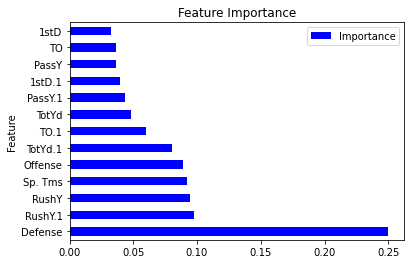

In [174]:
importances_df[0:13].plot(
    kind='barh', 
    color='blue', 
    title= 'Feature Importance', 
    legend=True)



In [175]:
# Instantiate a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

# Fit the training data to the random undersampler model
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

# Count distinct values for the resampled target data
y_undersampled.value_counts()

0.0    38
1.0    38
Name: results, dtype: int64

In [176]:
# Instantiate a new RandomForestClassier model
model_undersampled = RandomForestClassifier()

# Fit the undersampled data the new model
model_undersampled.fit(X_undersampled, y_undersampled)

# Predict labels for undersampled testing features
y_pred_undersampled = model_undersampled.predict(X_test)

# Print the undersampled classification report
print(classification_report(y_test, y_pred_undersampled))

              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76        15
         1.0       0.75      0.80      0.77        15

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.77      0.77      0.77        30



In [177]:
# Instantiate a RandomOversampler instance
ros = RandomOverSampler(random_state=1)

# Fit the model to the training data
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

# Count distinct values
y_oversampled.value_counts()

0.0    51
1.0    51
Name: results, dtype: int64

In [178]:
# Instantiate a new RandomForestClassier model
model_oversampled = RandomForestClassifier()

# Fit the oversampled data the new model
model_oversampled.fit(X_oversampled, y_oversampled)

# Predict labels for oversampled testing features
y_pred_oversampled = model_oversampled.predict(X_test)

# Print the oversampled classification report
print(classification_report(y_test, y_pred_oversampled))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84        15
         1.0       0.86      0.80      0.83        15

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30



In [179]:
# Import the data the model has not seen
texans_2022_df = pd.read_csv(
    'Resources/2022_texans_results.csv',
    header=1,
    index_col='Date'
)

texans_2022_df.head()

,Week,Day,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,Tm,...,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms
Date,,,,,,,,,,,,,,,,,,,,,
09/11/2022,1,Sun,1:00PM ET,boxscore,T,OT,0-0-1,NaN,Indianapolis Colts,20,...,77,1,33,517,340,177,2,-2.14,-5.67,9.43
09/18/2022,2,Sun,4:25PM ET,boxscore,L,NaN,0-1-1,@,Denver Broncos,9,...,80,0,20,350,201,149,1,-12.19,-3.38,5.20
09/25/2022,3,Sun,1:00PM ET,boxscore,L,NaN,0-2-1,@,Chicago Bears,20,...,92,2,17,363,82,281,2,-1.75,-2.69,1.18


In [180]:
# Drop the first week from the data
texans_2022_df.drop(texans_2022_df.index[0], axis=0, inplace=True)


# Drop the unnecessary columns to clean the data frame
texans_2022_df.drop('Week', axis=1, inplace=True)
texans_2022_df.drop('Unnamed: 3', axis=1, inplace=True)
texans_2022_df.drop('Unnamed: 4', axis=1, inplace=True)
texans_2022_df.drop('Unnamed: 8', axis=1, inplace=True)
texans_2022_df.drop('Rec', axis=1, inplace=True)
texans_2022_df.drop('OT', axis=1, inplace=True)
texans_2022_df.drop(['Tm','Opp.1'], axis=1, inplace=True)

# Rename the win/loss column
texans_2022_df.rename(columns={'Unnamed: 5':'win/loss'}, inplace=True)

# Change the win/loss columns to binary
texans_2022_df.loc[(texans_2022_df['win/loss'] == 'L'), 'results'] = 0
texans_2022_df.loc[(texans_2022_df['win/loss'] == 'W'), 'results'] = 1

# Display the clean data frame
texans_2022_df.head()

,Day,win/loss,Opp,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,results
Date,,,,,,,,,,,,,,,,,
09/18/2022,Sun,L,Denver Broncos,15,234,154,80,0,20,350,201,149,1,-12.19,-3.38,5.20,0.0
09/25/2022,Sun,L,Chicago Bears,17,329,237,92,2,17,363,82,281,2,-1.75,-2.69,1.18,0.0
